<a href="https://colab.research.google.com/github/mangekkyo/Machine-learning/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense, SimpleRNN
from keras.optimizers import RMSprop
from keras.callbacks import Callback
from tensorflow.keras.models import Model


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,  Dropout,Input,LSTM,GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
#mounting drive to upload data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')

In [ ]:
train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')

In [ ]:
train1 = train.iloc[:, 1:2].values

In [ ]:
train1

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train1)

In [ ]:
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(train_scaled[i-60:i,0])
  y_train.append(train_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [ ]:
dataset_total=pd.concat((train['Open'], test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)- len(test)- 60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)

In [ ]:
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
actual_stock_price=test.iloc[:,1:2].values

In [ ]:
#LSTM
time_steps=60

model=Sequential()
model.add(Input(shape=(time_steps,1)))
model.add(LSTM(48,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(48,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(48))
model.add(Dropout(0.2))
model.add(Dense(1,activation="relu"))

In [ ]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mse'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 11s 125ms/step - loss: 0.0368 - mse: 0.0368
Epoch 2/20
38/38 [==============================] - 7s 179ms/step - loss: 0.0053 - mse: 0.0053
Epoch 3/20
38/38 [==============================] - 5s 127ms/step - loss: 0.0053 - mse: 0.0053
Epoch 4/20
38/38 [==============================] - 10s 254ms/step - loss: 0.0058 - mse: 0.0058
Epoch 5/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0047 - mse: 0.0047
Epoch 6/20
38/38 [==============================] - 7s 177ms/step - loss: 0.0047 - mse: 0.0047
Epoch 7/20
38/38 [==============================] - 4s 112ms/step - loss: 0.0044 - mse: 0.0044
Epoch 8/20
38/38 [==============================] - 6s 147ms/step - loss: 0.0040 - mse: 0.0040
Epoch 9/20
38/38 [==============================] - 3s 92ms/step - loss: 0.0038 - mse: 0.0038
Epoch 10/20
38/38 [==============================] - 4s 108ms/step - loss: 0.0051 - mse: 0.0051
Epoch 11/20
38/38 [=============================

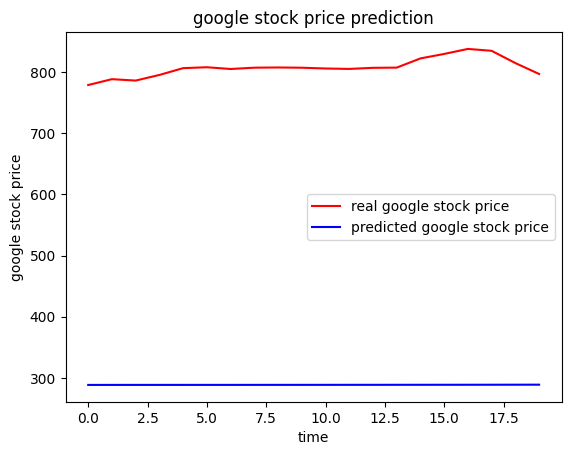

In [ ]:
plt.plot(actual_stock_price,color='red',label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label='predicted google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()

In [ ]:
#GRU
model=Sequential()
model.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mse'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 15s 137ms/step - loss: 0.0418 - mse: 0.0418
Epoch 2/20
38/38 [==============================] - 7s 183ms/step - loss: 0.0055 - mse: 0.0055
Epoch 3/20
38/38 [==============================] - 6s 157ms/step - loss: 0.0050 - mse: 0.0050
Epoch 4/20
38/38 [==============================] - 5s 136ms/step - loss: 0.0045 - mse: 0.0045
Epoch 5/20
38/38 [==============================] - 7s 192ms/step - loss: 0.0044 - mse: 0.0044
Epoch 6/20
38/38 [==============================] - 6s 149ms/step - loss: 0.0042 - mse: 0.0042
Epoch 7/20
38/38 [==============================] - 8s 206ms/step - loss: 0.0040 - mse: 0.0040
Epoch 8/20
38/38 [==============================] - 5s 136ms/step - loss: 0.0036 - mse: 0.0036
Epoch 9/20
38/38 [==============================] - 6s 158ms/step - loss: 0.0035 - mse: 0.0035
Epoch 10/20
38/38 [==============================] - 6s 163ms/step - loss: 0.0032 - mse: 0.0032
Epoch 11/20
38/38 [=============================

1/1 [==============================] - 0s 88ms/step


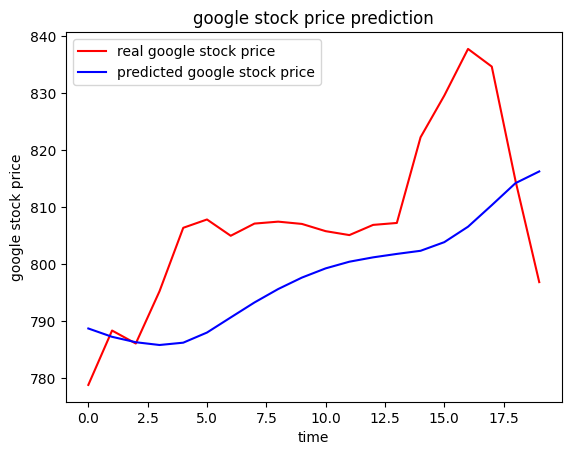

In [ ]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)
import matplotlib.pyplot as plt
plt.plot(actual_stock_price,color='red',label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label='predicted google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()

Interpretation: The MSE value of LSTM Model - 0.0034 and GRU - 0.0026.
GRU model performed for Google Stock Prediction Data.
Both of the models performed good considering the mse is very low.